In [1]:
import os
import sys
# !{sys.executable} -m pip install seaborn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
#location = '/home/cjensen/kusterlab_home/kusterlab/internal_projects/active/TOPAS/WP31/Searches/Workflow_Test/BatchPDX1_FP_mixedFASTA/combined/txt'
location = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Searches/Workflow_Test/BatchPDX1_FP_mixedFASTA/combined/txt'

pdx_df = pd.read_csv(os.path.join(location, "evidence_organism.txt"), sep='\t')


In [61]:
pdx_df['Organism'].value_counts()

HUMAN;MOUSE        44830
HUMAN              31586
MOUSE              10842
CON;HUMAN            767
CON                  627
CON;HUMAN;MOUSE      395
CON;MOUSE             63
Name: Organism, dtype: int64

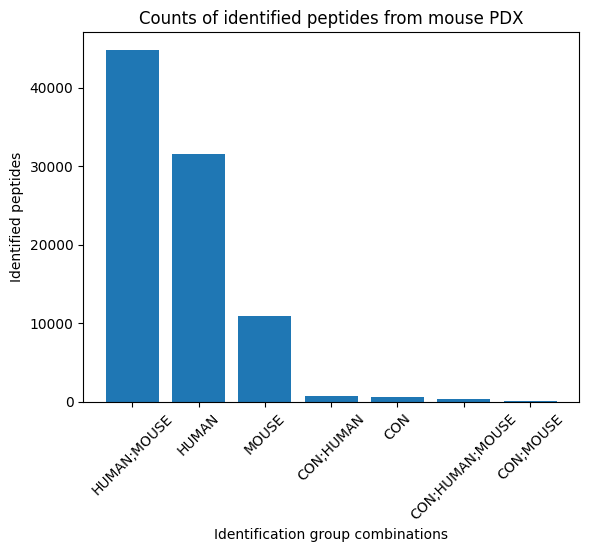

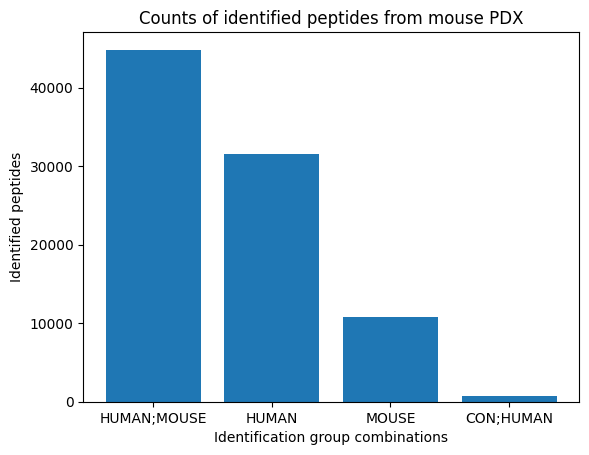

HUMAN;MOUSE        44830
HUMAN              31586
MOUSE              10842
CON;HUMAN            767
CON                  627
CON;HUMAN;MOUSE      395
CON;MOUSE             63
Name: Organism, dtype: int64


In [62]:
# Barplot

# Count the occurrences of each unique combination of values
unique_counts = pdx_df['Organism'].value_counts()

# Create a bar plot
plt.bar(unique_counts.index, unique_counts.values)
plt.xlabel('Identification group combinations')
plt.ylabel('Identified peptides')
plt.title('Counts of identified peptides from mouse PDX')
plt.xticks(rotation=45)
plt.show()

# Cleaned version
unique_counts = unique_counts[0:4]
plt.bar(unique_counts.index, unique_counts.values)
plt.xlabel('Identification group combinations')
plt.ylabel('Identified peptides')
plt.title('Counts of identified peptides from mouse PDX')
plt.show()

print(pdx_df['Organism'].value_counts())


                    Modified sequence  \
73082              _SYELPDGQVITIGNER_   
45291       _LCYVALDFEQEMATAASSSSLEK_   
35988                    _GYSFTTTAER_   
78766            _VAPEEHPVLLTEAPLNPK_   
19934                   _EITALAPSTMK_   
84497           _VTIAQGGVLPNIQAVLLPK_   
81217         _VIISAPSADAPMFVMGVNHEK_   
5418                _AMGIMNSFVNDIFER_   
88881              _YPIEHGIITNWDDMEK_   
949              _AAVPSGASTGIYEALELR_   
15318                   _DSYVGDEAQSK_   
85372  _VVTPLSPPTNLHLEANPDTGVLTVSWER_   
49676           _LLQDSVDFSLADAINTEFK_   
41493                    _ISGLIYEETR_   
3018                      _AGLQFPVGR_   
77962                  _TVTAMDVVYALK_   
81322                      _VIPELNGK_   
73225                _SYTITGLQPGTDYK_   
62262                 _QEYDESGPSIVHR_   
8209                _AVFVDLEPTVIDEVR_   

                                              Gene names     Intensity  
73082  Actb;ACTB;ACTBL2;POTEKP;Actg1;ACTG1;Actc1;ACTC...  2.37230

/home/matthewt/git/wp3_sample_pipeline/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


                 Modified sequence Gene names     Intensity
53874             _LVINGNPITIFQER_      GAPDH  1.514500e+11
48419             _LISWYDNEFGYSNR_      GAPDH  1.433900e+11
28804            _GALQNIIPASTGAAK_      GAPDH  1.497200e+11
84794          _VTWAPPPSIDLTNFLVR_        FN1  7.467800e+10
39550          _IISNASCTTNCLAPLAK_      GAPDH  9.773900e+10
83193            _VPGTSTSATLTGLTR_        FN1  6.814200e+10
71882        _SSPVVIDASTAIDAPSNLR_        FN1  6.237800e+10
30257               _GEWTCIAYSQLR_        FN1  5.964700e+10
79535            _VDVIPVNLPGEHGQR_        FN1  5.290800e+10
86097      _WGDAGAEYVVESTGVFTTMEK_      GAPDH  6.372900e+10
19797      _EINLAPDSSSVVVSGLMVATK_        FN1  4.349000e+10
32300  _GLKPGVVYEGQLISIQQYGHQEVTR_        FN1  4.311600e+10
18318         _EESPLLIGQQSTVSDVPR_        FN1  3.872500e+10
30566          _GFNCESKPEAEETCFDK_        FN1  3.847400e+10
84531           _VTIMWTPPESAVTGYR_        FN1  3.752000e+10
48771             _LLCQCLGFGSGHFR_      

/home/matthewt/git/wp3_sample_pipeline/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/matthewt/git/wp3_sample_pipeline/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


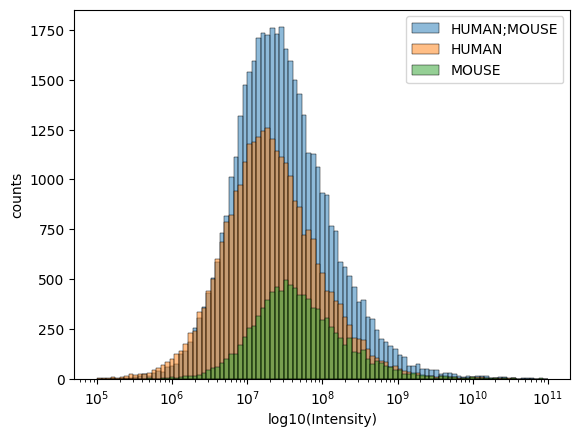

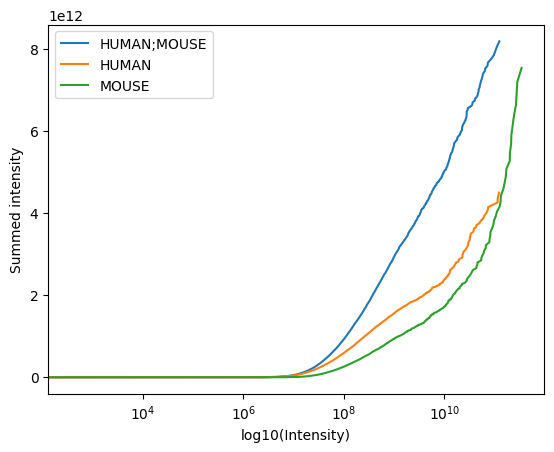

In [70]:
# Densityplot

# Select the columns starting with "Reporter intensity"
tmt_columns = pdx_df.columns[pdx_df.columns.str.startswith('Reporter intensity corrected')]
# print(tmt_columns)

intensity_columns = 'Intensity'

# Create a single figure with a density plot for each unique combination of organisms
hist_ax = None
for organism_combination in pdx_df['Organism'].unique()[:3][::-1]:
    # Filter the rows with the specific organism combination
    subset = pdx_df.loc[pdx_df['Organism'] == organism_combination, :]
    subset = subset.replace(0, np.nan)

    # Flatten the values from all the intensity columns for the specific organism combination
    intensities = subset[intensity_columns]
    intensities *= subset[tmt_columns[:8]].sum(axis=1) / subset[tmt_columns].sum(axis=1)
    print(subset.loc[intensities.sort_values(ascending=False)[:20].index][['Modified sequence', 'Gene names', 'Intensity']])
    
    intensities = intensities.dropna()
    values = intensities.values

#     values = np.log10(values)
    print(organism_combination)
#     print(np.nanmean(values))
    print(f"{np.nansum(values):.2e}")

    # Create a density plot for the combination
    hist_ax = sns.histplot(values, alpha=0.5, fill=True, label=organism_combination, bins=np.linspace(5, 11, 100), log_scale=(True,False), ax=hist_ax)

    values = sorted(values)
    plt.figure(2)
    plt.plot(values, np.cumsum(values), label=organism_combination)

hist_ax.set_xlabel('log10(Intensity)')
hist_ax.set_ylabel('counts')
hist_ax.legend()

plt.xscale("log")
plt.xlabel('log10(Intensity)')
plt.ylabel('Summed intensity')
# plt.title('Density Plots for Different Organism Combinations')
plt.legend()
plt.show()


In [ ]:
location = '/home/cjensen/kusterlab_home/kusterlab/internal_projects/active/TOPAS/WP31/Searches/Workflow_Test/BatchPDX1_FP_mixedFASTA/combined/txt'
# location = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Searches/Workflow_Test/BatchPDX1_FP_mixedFASTA/combined/txt'

pdx_df_all = pd.read_csv(os.path.join(location, "evidence_organism_all.txt"), sep='\t')


In [ ]:
unique_counts = pdx_df_all['Organism'].str.split(';').explode().value_counts()
print(unique_counts)


In [ ]:
# Barplot

# Create a bar plot
plt.bar(unique_counts.index, unique_counts.values)
plt.xlabel('Identifications per uniprotID')
plt.ylabel('Identified peptides')
plt.title('Counts of identified peptides from mouse PDX')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pdx_df[pdx_df['Organism'] == 'HUMAN'].columns